In [5]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
yourzip =input("Please enter your zipcode:")
yourcar =input("Please enter your car name:")

car_zip = yourcar +"_"+ yourzip
conn = sqlite3.connect('carvana.db')
c = conn.cursor()
# Create table
c.execute("CREATE TABLE IF NOT EXISTS {}(model varchar (20) NOT NULL,\
          year INT NOT NULL,make varchar (20) NOT NULL,\
          trim varchar (20) NOT NULL,\
          miles_driven INT NOT NULL,price INT NOT NULL)".format(car_zip))
PATH = "/Users/alishawarke/Downloads/chromedriver"
driver = webdriver.Chrome(PATH)
URL = "https://www.carvana.com/cars"

Please enter your zipcode:02125
Please enter your car name:civic


/var/folders/th/3mx1tpb95yl0z_zy_4vnkcxw0000gn/T/ipykernel_31529/1232658294.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [4]:
pip install scikit-learn

     |████████████████████████████████| 8.0 MB 1.4 MB/s            
     |████████████████████████████████| 306 kB 31.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [13]:
driver.get(URL)
search = driver.find_element_by_class_name("LocationButton__DownArrow-tbps9y-1")
search.click()
time.sleep(7)
zipcode = driver.find_element_by_name("ZIP CODE")
zipcode.send_keys(yourzip)
zipcode.send_keys(Keys.RETURN)
time.sleep(5)
searchcar = driver.find_element_by_class_name("react-autosuggest__input")
searchcar.send_keys(yourcar)
searchcar.send_keys(Keys.RETURN)

time.sleep(10)
currurl = driver.current_url
pg1 = "&page=$NUM$"

correcturl= currurl + pg1
print(correcturl)

/var/folders/th/3mx1tpb95yl0z_zy_4vnkcxw0000gn/T/ipykernel_31529/266048605.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search = driver.find_element_by_class_name("LocationButton__DownArrow-tbps9y-1")
/var/folders/th/3mx1tpb95yl0z_zy_4vnkcxw0000gn/T/ipykernel_31529/266048605.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  zipcode = driver.find_element_by_name("ZIP CODE")
/var/folders/th/3mx1tpb95yl0z_zy_4vnkcxw0000gn/T/ipykernel_31529/266048605.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  searchcar = driver.find_element_by_class_name("react-autosuggest__input")


https://www.carvana.com/cars/honda-civic/filters/?cvnaid=eyJtb2RlbElkcyI6WzU2LDUxNF19&email-capture=&page=$NUM$


In [14]:
page_content = driver.page_source

total_pages= re.compile(r'<span data-cv-test="Cv.Search.Pagination.CurrentPageDisplay" data-qa="pagination-text".*?Page 1 of (.*?)</span>',re.S|re.I).findall(page_content)
#print(total_pages)
time.sleep(10)
for x in total_pages:
    num_of_pages= int(x)
    print(num_of_pages)

39


In [18]:
for i in range(2):
#for i in range(num_of_pages):
    page_URL=correcturl.replace("$NUM$",str(i+1))
    print("Collecting car data from Page "+ str(i+1))
    driver.get(page_URL)
    time.sleep(10)
    page_content=driver.page_source
    
    all_chunks=re.compile(r"result-tile(.*?)near-missing-match",re.S|re.I).findall(page_content)
    if len(all_chunks)>0:
        for chunk in all_chunks:
            #initialization
            model=""
            year=""
            make=""
            trim="" 
            miles_driven=""
            price=""
            
            #parsing model
            models=re.compile(r'<div class="model">(.*?)</div>',re.S|re.I).findall(chunk)
            if(len(models)>0):
                model=models[0]
                print(model)
                
            #parsing year
            years=re.compile(r'<div class="year-make">(.*?)<!.*?</div>' ,re.S|re.I).findall(chunk)
            if(len(years)>0):
                year=years[0]
            
            #parsing make
            makes=re.compile(r'<div class="year-make">.*?-->.*?-->(.*?)</div>' ,re.S|re.I).findall(chunk)
            if(len(makes)>0):
                make=makes[0]
            
            #parsing trim
            trims=re.compile(r'<div class="trim" data-test="Trim" data-qa="trim">(.*?)</div>' ,re.S|re.I).findall(chunk)
            if(len(trims)>0):
                trim=trims[0]
            
            #parsing miles_driven
            miles=re.compile(r'<div class="mileage" data-test="Mileage" data-qa="mileage">(.*?)<!.*?</div>' ,re.S|re.I).findall(chunk)
            if(len(miles)>0):
                miles_driven=miles[0]
                miles_driven=int(miles_driven.replace(",", ""))
            
            #parsing price
            prices=re.compile(r'<div class="price "><sup>.*?</sup>(.*?)</div>' ,re.S|re.I).findall(chunk)
            if(len(prices)>0):
                price=prices[0]
                price=int(price.replace(",", ""))
            
            print(model,":",year,":",make,":",trim,":",miles_driven,":",price) # printing collected data to screen
            
            c.execute("INSERT INTO {}(model, year, make, trim, miles_driven, price) VALUES(?,?,?,?,?,?)".format(car_zip),(model, year, make, trim, miles_driven, price))



 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 
 :  :  :  :  : 


In [194]:
result=c.execute("SELECT * FROM {} ".format(car_zip))


sql_query = pd.read_sql_query ('''SELECT * FROM {}'''.format(car_zip), conn)
#print(sql_query)
df = pd.DataFrame(sql_query)


pd.set_option('display.max_columns', None)
print(df.head(5))

conn.commit()
conn.close()

    model  year   make      trim  miles_driven  price
0  Accord  2017  Honda  Sport SE         42427  24990
1  Accord  2011  Honda        LX         47578  17590
2  Accord  2017  Honda        LX         70795  20990
3  Accord  2017  Honda        LX         31565  23990
4  Accord  2015  Honda        LX         52746  19990


In [195]:
df.describe()

,year,miles_driven,price
count,40.000000,40.000000,40.000000
mean,2014.600000,49820.075000,21715.000000
std,2.677542,25313.292581,4271.476656
min,2009.000000,7030.000000,15990.000000
25%,2012.000000,31249.500000,17990.000000
50%,2015.000000,45567.500000,20990.000000
75%,2017.000000,69840.000000,23990.000000
max,2020.000000,101457.000000,31990.000000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         40 non-null     object
 1   year          40 non-null     int64 
 2   make          40 non-null     object
 3   trim          40 non-null     object
 4   miles_driven  40 non-null     int64 
 5   price         40 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.0+ KB


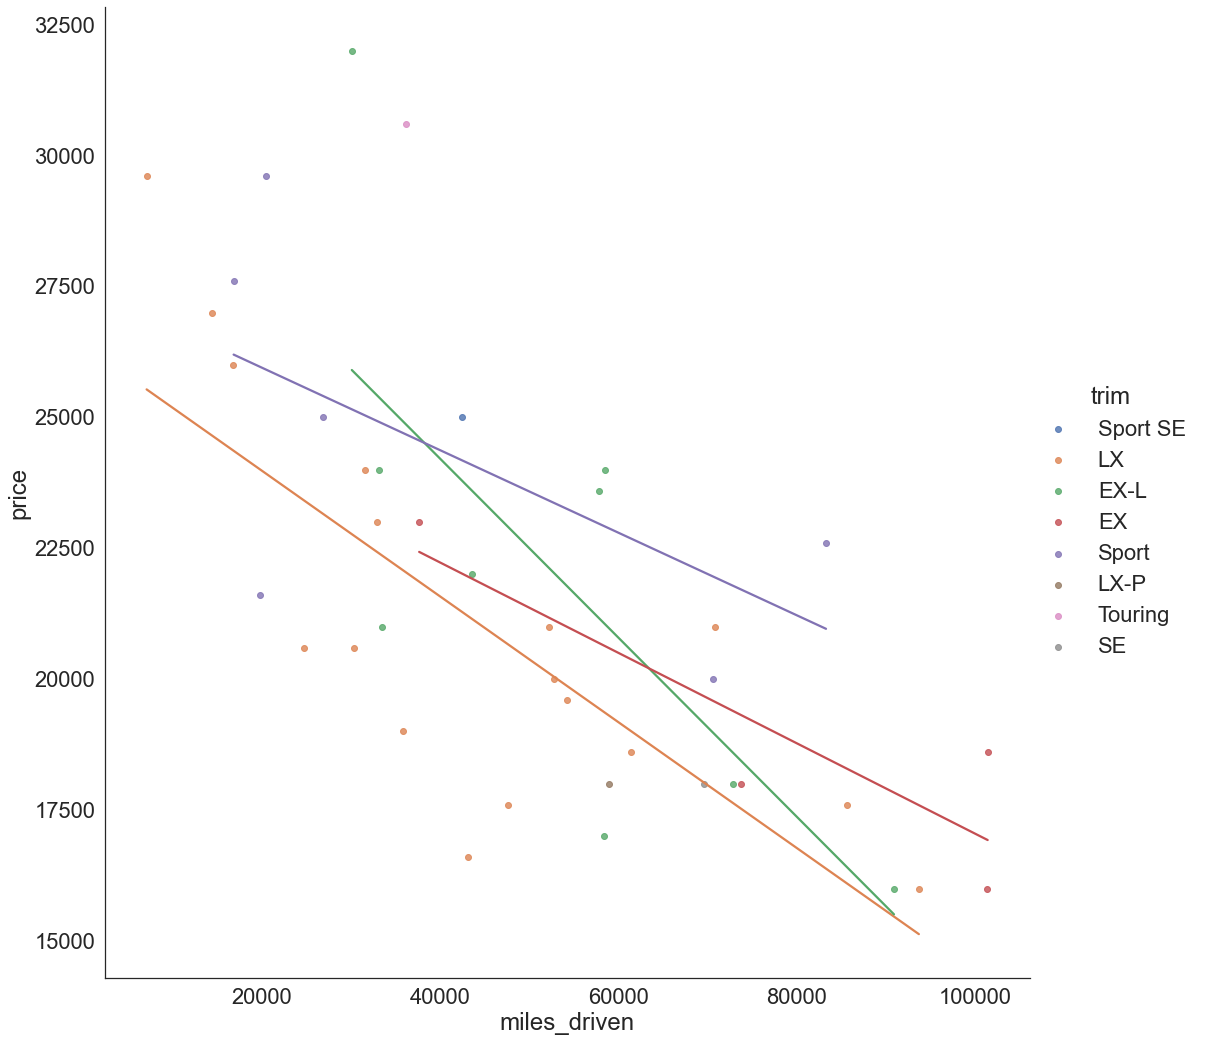

In [197]:
sns.set(font_scale=2)
sns.set_style("white")
sns.lmplot(x='miles_driven',y= 'price',hue='trim', data=df,ci=None, height=15, aspect=1)
plt.savefig("lmplot.png")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'EX'),
  Text(1, 0, 'EX-L'),
  Text(2, 0, 'LX'),
  Text(3, 0, 'LX-P'),
  Text(4, 0, 'SE'),
  Text(5, 0, 'Sport'),
  Text(6, 0, 'Sport SE'),
  Text(7, 0, 'Touring')])

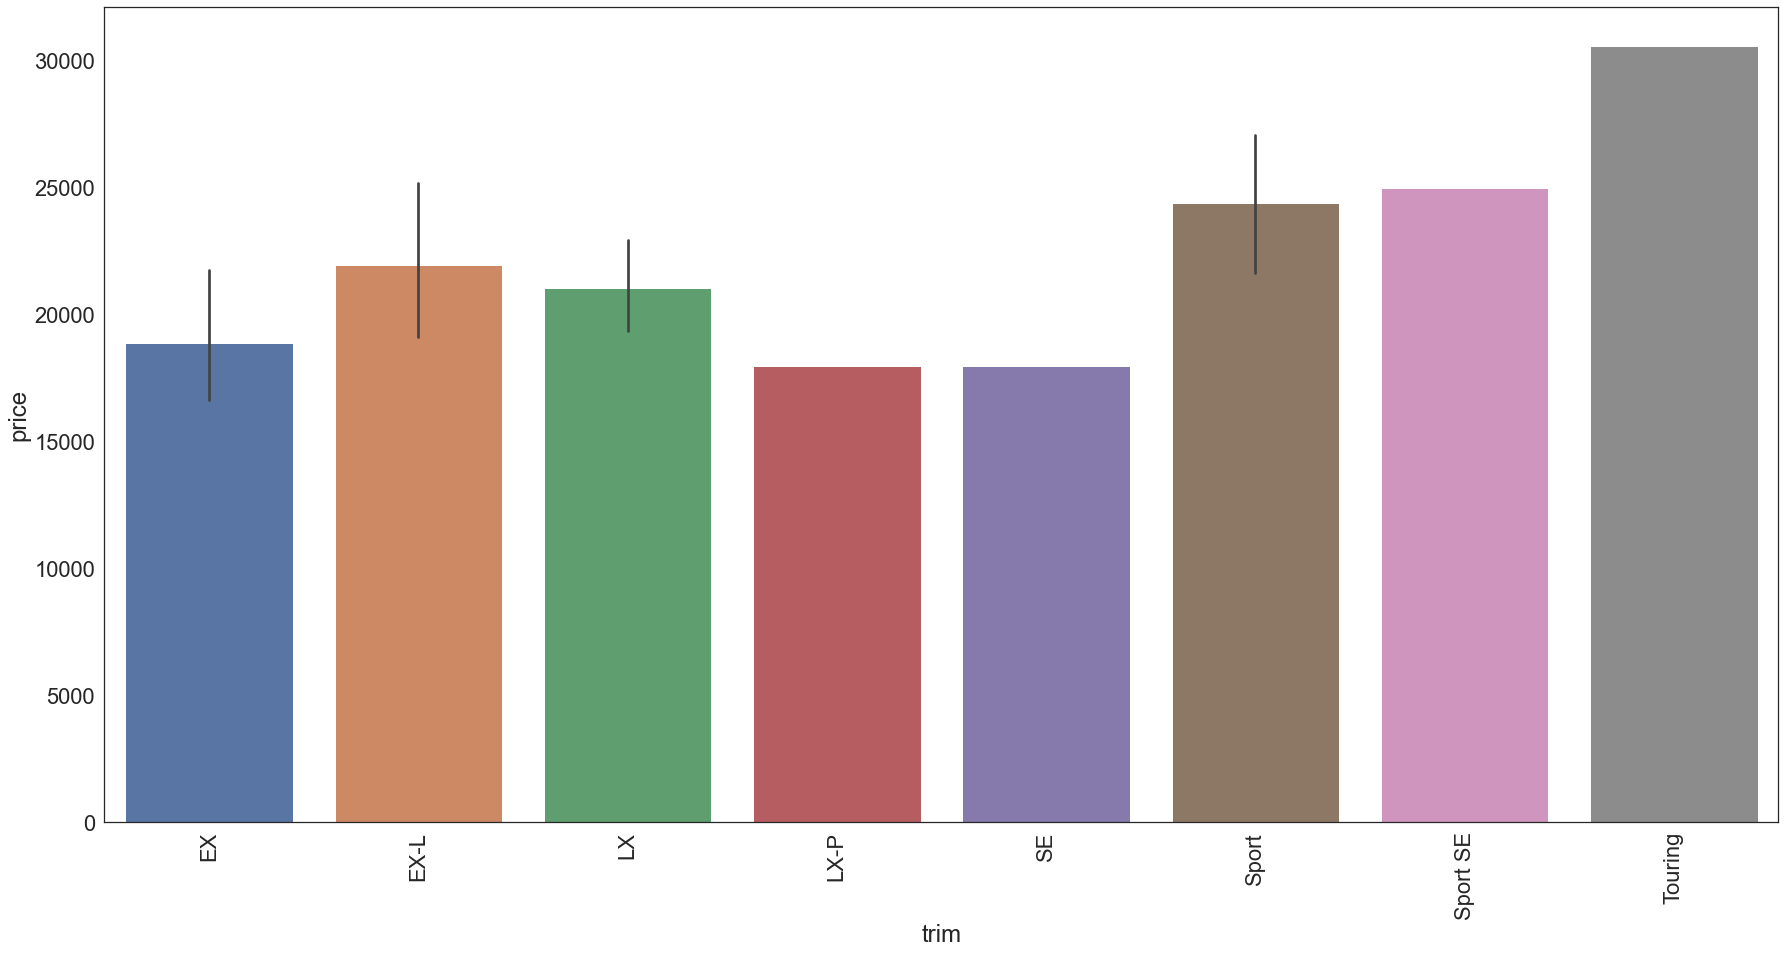

In [198]:
plt.figure(figsize = (30,15))
sns.barplot(x = 'trim', y = 'price', data = df.sort_values('trim'))
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sport SE'),
  Text(1, 0, 'LX'),
  Text(2, 0, 'EX-L'),
  Text(3, 0, 'EX'),
  Text(4, 0, 'Sport'),
  Text(5, 0, 'LX-P'),
  Text(6, 0, 'Touring'),
  Text(7, 0, 'SE')])

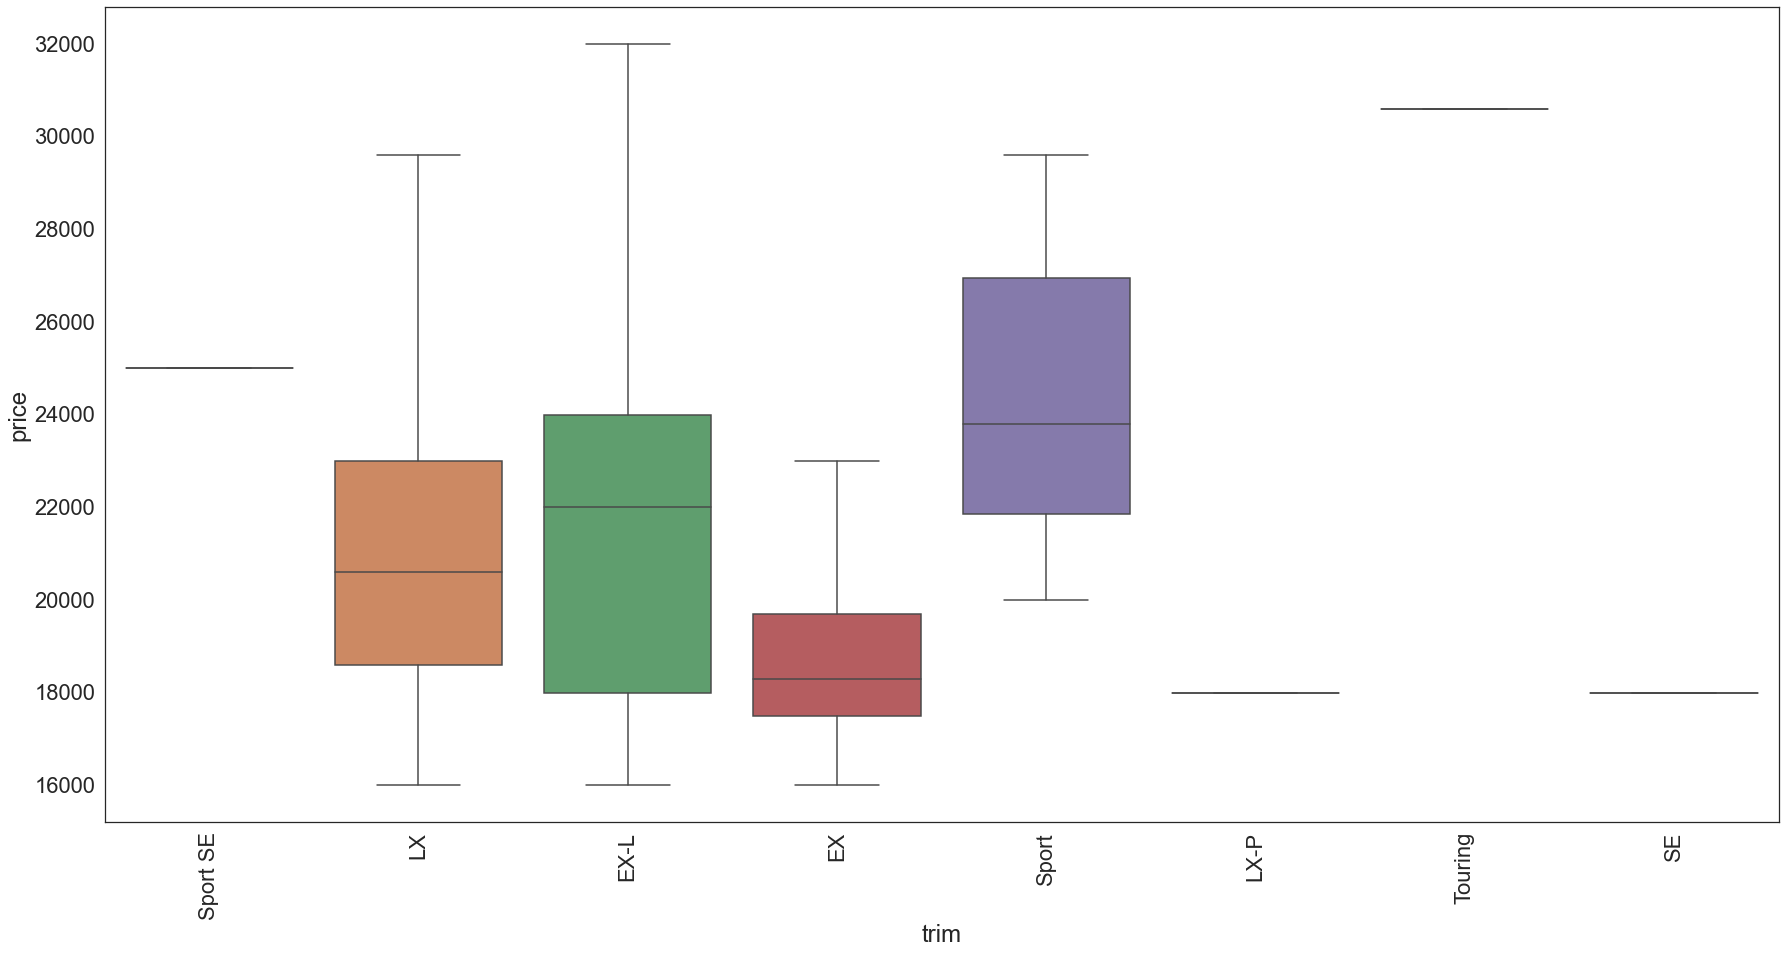

In [199]:
plt.figure(figsize = (30,15))
sns.boxplot(x = 'trim', y = 'price', data = df)
plt.xticks(rotation=90)


<AxesSubplot:xlabel='year', ylabel='price'>

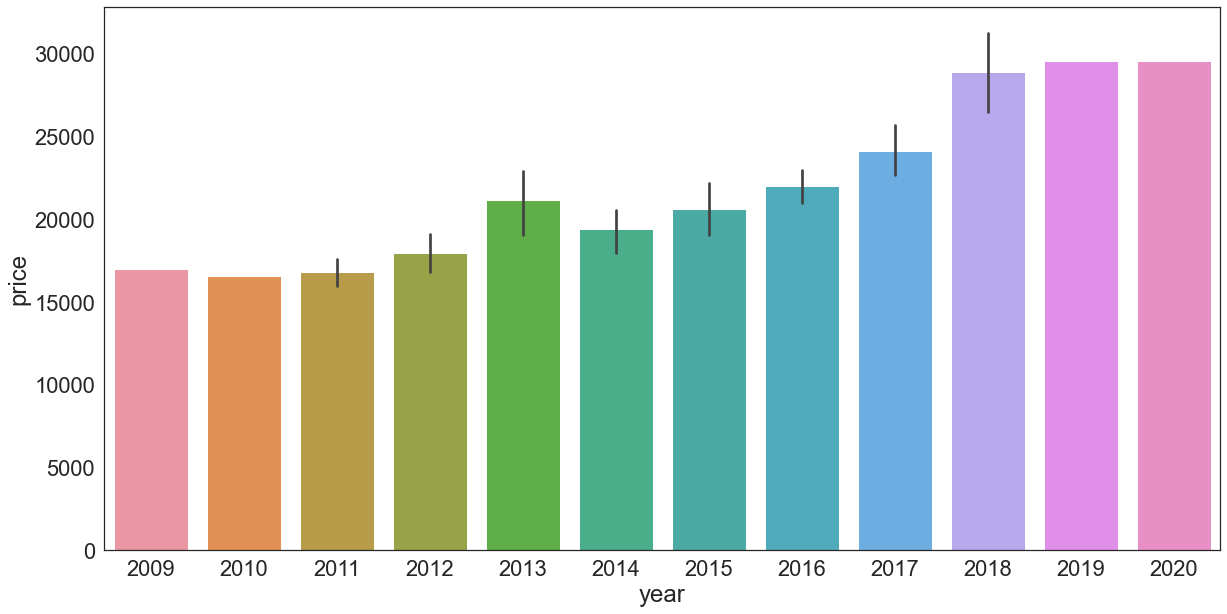

In [200]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'year', y = 'price', data = df)


<AxesSubplot:xlabel='year', ylabel='price'>

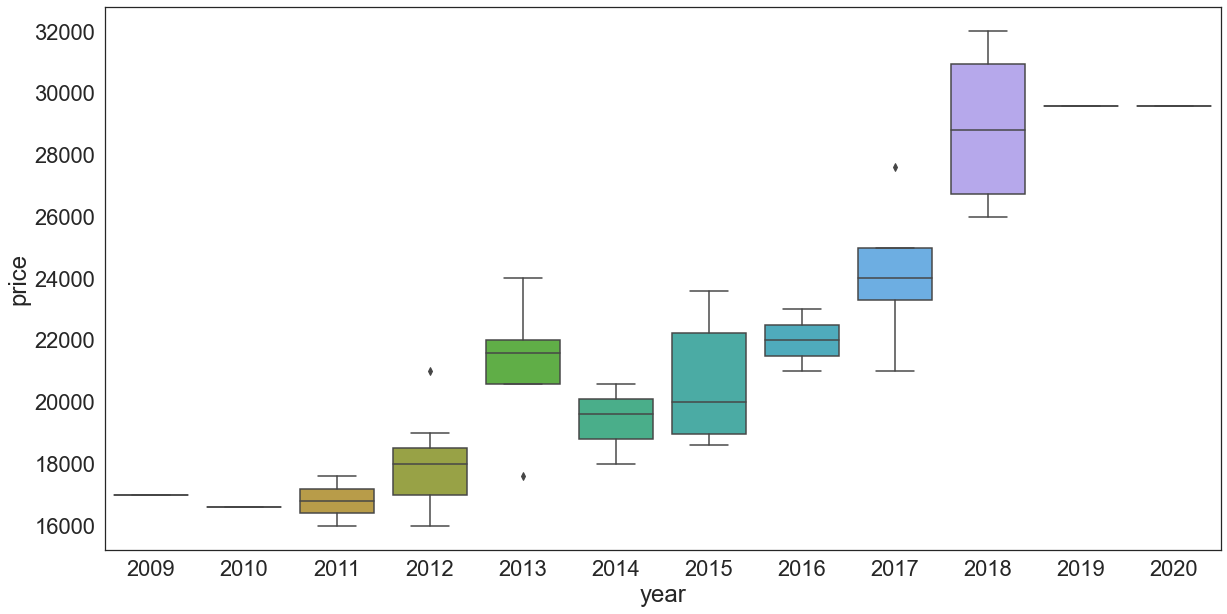

In [201]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'year', y = 'price', data = df)


<AxesSubplot:ylabel='trim'>

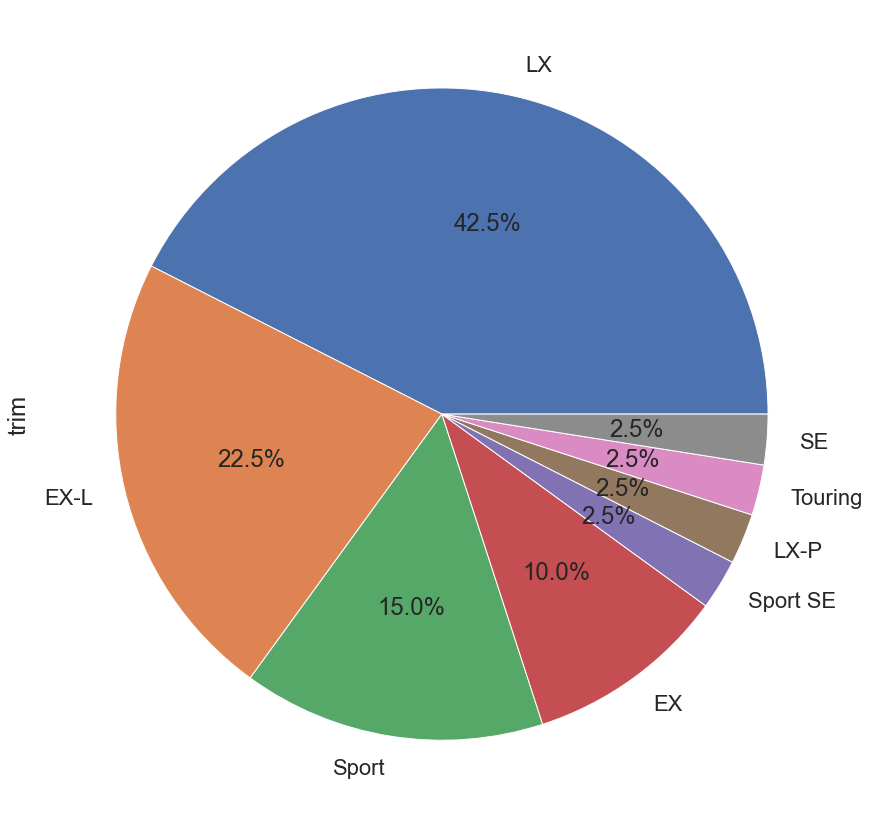

In [202]:
plt.figure(figsize = (30,15))
df['trim'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')



In [203]:
df['age']=2022-df['year']

In [111]:
print(df)

      model  year   make     trim  miles_driven  price  age
0     Civic  2015  Honda       SE         46510  18990    7
1     Civic  2018  Honda       LX         29553  22590    4
2     Civic  2013  Honda       Si         39012  22590    9
3     Civic  2018  Honda       EX         40133  24990    4
4     Civic  2014  Honda       LX         82575  17990    8
...     ...   ...    ...      ...           ...    ...  ...
1168  Civic  2015  Honda       LX         70232  16590    7
1169  Civic  2016  Honda     EX-L         36448  22990    6
1170  Civic  2018  Honda       LX         39134  21990    4
1171  Civic  2014  Honda       EX         97200  16990    8
1172  Civic  2018  Honda  Touring         12817  26990    4

[1173 rows x 7 columns]


In [204]:
dummies = pd.get_dummies(df['trim'])
dum_col =list(dummies.columns)

pred_col = dum_col + ['age', 'miles_driven']

analysis_df=pd.concat([df,dummies],axis=1, ignore_index=False)
analysis_df=analysis_df.drop(['model', 'year', 'make', 'trim'], axis=1)

In [163]:
#print(analysis_df)

,miles_driven,price,age,EX,EX w/Honda Sensing,EX-L,EX-L w/Navigation,EX-T,EX-T w/Honda Sensing,GX,HF,Hybrid,LX,LX w/Honda Sensing,LX-P,LX-S,Limited Edition Hatchback,SE,Si,Sport,Sport Touring,Touring,Touring Hatchback,VP
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,43548.883205,23212.720375,5.680307,0.208866,0.006820,0.062234,0.004263,0.050298,0.002558,0.000853,0.001705,0.004263,0.417732,0.001705,0.005115,0.000853,0.002558,0.011083,0.043478,0.080136,0.005115,0.023018,0.065644,0.001705
std,25814.852809,7224.715828,2.699247,0.406672,0.082337,0.241682,0.065177,0.218653,0.050529,0.029198,0.041274,0.065177,0.493396,0.041274,0.071367,0.029198,0.050529,0.104734,0.204018,0.271620,0.071367,0.150024,0.247764,0.041274
min,466.000000,10990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21816.000000,17990.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41503.000000,21990.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63547.000000,24990.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,104753.000000,63990.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
x=analysis_df[pred_col]
y=analysis_df['price']

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)

In [207]:
regr = LinearRegression()
  
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

0.8481802641025951


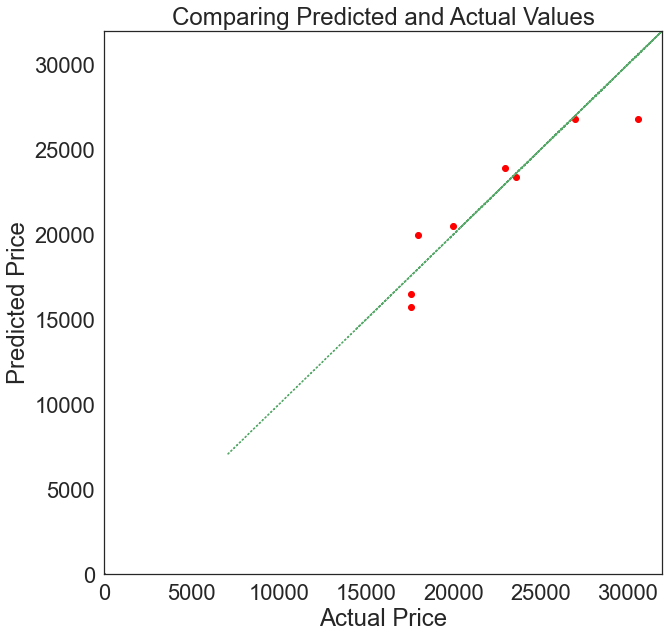

In [208]:
Y_pred = regr.predict(X_test)
#print(Y_pred)
#print(Y_test)
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, Y_pred, c='red')
plt.plot(x, x,':g')
plt.title('Comparing Predicted and Actual Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.ylim(0,max(df['price']))
plt.xlim(0,max(df['price']))
plt.savefig("PredVsActual.png")